# AC simulation of asymmetric single carrier devices

This example shows AC simulation by reproducing plots from [S. L. M. van Mensfoort, R. Coehoorn, Determination of Injection Barriers in Organic Semiconductor Devices from Capacitance Measurements, Phys Rev Lett 100, 086802 (2008)](https://doi.org/10.1103/PhysRevLett.100.086802).

In [1]:
import matplotlib.pylab as plt

In [2]:
%matplotlib inline

In [3]:
from oedes.solver import *
from oedes import *

In [4]:
params = {
    'T': 300.,
    'electrode0.voltage': 0.,
    'electrode0.workfunction': 0.,
    'electrode1.voltage': 0.,
    'electrode1.workfunction': 0.,
    'hole.N0': 1e27,
    'hole.level': 0.,
    'hole.mu': 1e-9,
    'epsilon_r': 3.
}

In [5]:
L = 100e-9

In [6]:
Cgeom = params['epsilon_r'] * scipy.constants.epsilon_0 / L

In [7]:
u = models.holeonly(L)

In [8]:
def _cvscan(
        model,
        params,
        voltages,
        freq,
        electrode='electrode0.voltage',
        output='J'):
    c = context(model)
    omega = 2 * np.pi * freq
    for step in c.sweep(setparam(params, electrode, voltages)):
        acx, acj = step.acsolver(electrode, output).solve(omega)
        yield step.params[electrode], np.imag(acj) / omega, np.real(acj), np.imag(acj)

In [9]:
def cvscan(*args, **kwargs):
    result = np.asarray(list(_cvscan(*args, **kwargs)))
    testing.store(result, atol=1e-8)
    return result

In [10]:
voltages = np.linspace(-1, 2, 200)
freq = 1e3

## Fig. 2a

Text(0,0.5,'$C/C_{geom}$')

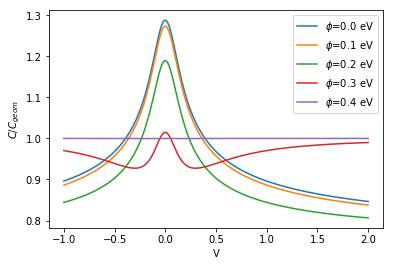

In [11]:
for bar in [0., 0.1, 0.2, 0.3, 0.4]:
    params['electrode0.workfunction'] = -bar
    params['electrode1.workfunction'] = -bar
    cv = np.asarray(list(cvscan(u, params, voltages, freq)))
    plt.plot(cv[:, 0], cv[:, 1] / Cgeom, label='$\phi$=%.1f eV' % bar)
plt.legend(loc=0)
plt.xlabel('V')
plt.ylabel('$C/C_{geom}$')

## Fig. 2b

Text(0,0.5,'$C/C_{geom}$')

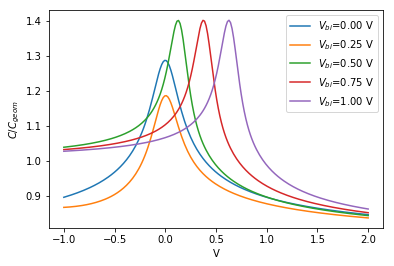

In [12]:
for vbi in [0, 0.25, 0.5, 0.75, 1.]:
    params['electrode0.workfunction'] = 0.
    params['electrode1.workfunction'] = -vbi
    cv = np.asarray(list(cvscan(u, params, voltages, freq)))
    plt.plot(cv[:, 0], cv[:, 1] / Cgeom, label='$V_{bi}$=%.2f V' % vbi)
plt.legend(loc=0)
plt.xlabel('V')
plt.ylabel('$C/C_{geom}$')

## Fig. 2c

Text(0,0.5,'$C/C_{geom}$')

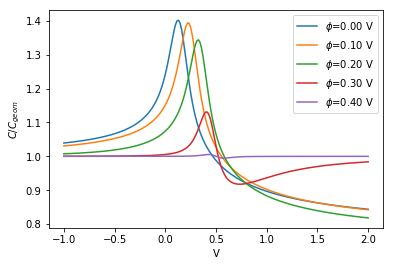

In [13]:
for bar in [0., 0.1, 0.2, 0.3, 0.4]:
    params['electrode0.workfunction'] = -bar
    params['electrode1.workfunction'] = -bar - 0.5
    cv = np.asarray(list(cvscan(u, params, voltages, freq)))
    plt.plot(cv[:, 0], cv[:, 1] / Cgeom, label='$\phi$=%.2f V' % bar)
plt.legend(loc=0)
plt.xlabel('V')
plt.ylabel('$C/C_{geom}$')

## Fig. 2d

Text(0,0.5,'$C/C_{geom}$')

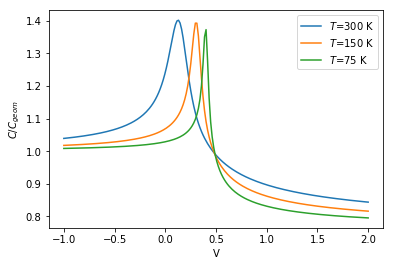

In [14]:
for T in [300., 150., 75.]:
    params['electrode0.workfunction'] = 0.
    params['electrode1.workfunction'] = -0.5
    params['T'] = T
    cv = np.asarray(list(cvscan(u, params, voltages, freq)))
    plt.plot(cv[:, 0], cv[:, 1] / Cgeom, label='$T$=%.0f K' % T)
plt.legend(loc=0)
plt.xlabel('V')
plt.ylabel('$C/C_{geom}$')

## Fig. 4

In [15]:
params['T'] = 295
params['epsilon_r'] = 3.2
params['electrode0.workfunction'] = -0.015
params['electrode1.workfunction'] = -1.635
params['hole.mu'] = 1e-10
params['hole.N0'] = 1.8e26
Cgeom = params['epsilon_r'] * scipy.constants.epsilon_0 / L

Text(0,0.5,'$C/C_{geom}$')

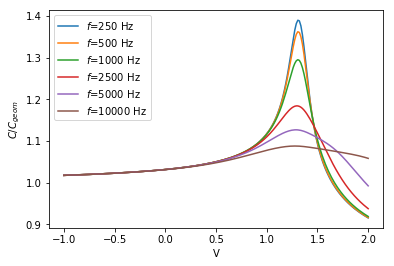

In [16]:
for freq in [250, 500, 1e3, 2.5e3, 5e3, 1e4]:
    cv = np.asarray(list(cvscan(u, params, voltages, freq)))
    plt.plot(cv[:, 0], cv[:, 1] / Cgeom, label='$f$=%.0f Hz' % freq)
plt.legend(loc=0)
plt.xlabel('V')
plt.ylabel('$C/C_{geom}$')


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
